# 2021 Refinitiv Natural Gas - Analyst Test
*Prepared by Amina Talipova.*
## Below is my approach to solve the basic set of three problems: 
1.	Prepare temperature Data in 6 UK regions

#### I solve this task with two general methods described in the "Rationale and logic implementation" pdf file, where the second method consists of two submethods, each with different methodological approach. Here I start from the most accurate one (Method 3 in pdf Report), and then show two ways of how implement Method 2, described in Report. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os

In [2]:
# open data file

path = os.getcwd()
filePath = path + r'\UK Temperatures.csv'
print(filePath)

C:\Users\User\UK Temperatures.csv


In [3]:
# unify columns' titles and set daytime column as index 

df = pd.read_csv(filePath, parse_dates=[0],header = 0, dayfirst=True, usecols=range(7))
df = df.rename(columns = {"Unnamed: 0" : "DateTime"})
df = df.set_index('DateTime')

In [4]:
# analyze dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8451 entries, 2016-01-01 00:00:00 to 2016-12-31 00:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brice Norton  7998 non-null   float64
 1   Herstmonceux  8217 non-null   float64
 2   Heathrow      8355 non-null   float64
 3   Nottingham    8327 non-null   float64
 4   Shawbury      8266 non-null   float64
 5   Waddington    8386 non-null   float64
dtypes: float64(6)
memory usage: 462.2 KB


In [5]:
# analyze dataframe

df.head(10)

,Brice Norton,Herstmonceux,Heathrow,Nottingham,Shawbury,Waddington
DateTime,,,,,,
2016-01-01 00:00:00,3.4,5.2,3.8,2.5,NaN,3.7
2016-01-01 12:00:00,4.9,8.2,7.0,3.3,4.3,2.4
2016-01-01 18:00:00,NaN,NaN,NaN,5.2,5.9,NaN
2016-01-02 00:00:00,7.6,8.5,8.1,6.4,7.0,6.9
2016-01-02 06:00:00,9.1,10.2,9.7,7.1,8.4,7.2
2016-01-02 12:00:00,9.6,9.8,10.1,8.7,9.4,8.6
2016-01-02 18:00:00,9.2,11.0,10.9,8.4,8.9,8.5
2016-01-03 00:00:00,9.0,9.3,9.7,7.8,8.4,8.2
2016-01-03 06:00:00,4.3,4.9,5.2,6.6,5.6,7.6


### Method 2.1.  

In [ ]:
df1 = pd.read_csv(filePath, index_col=0)
df1.index = pd.to_datetime(df1.index)
df1.head()

In [ ]:
df1['hour'] = df1.index.hour.values
df1

In [ ]:
df1s = []
for hour, data in df1.groupby('hour'):
    df1s.append(
        ((data.fillna(method='bfill') + 
         data.fillna(method='ffill'))/2).
        fillna(method='bfill').
        fillna(method='ffill')
    )
df_filled = pd.concat(df1s, axis=0).sort_index()

In [ ]:
df_filled['date'] = df_filled.index.date
df_filled.drop(labels=['hour'], axis=1, inplace=True)
df_daily=df_filled.groupby('date').agg(np.mean)
print(df_daily.head(10))

In [ ]:


df_daily.info()


In [ ]:
df_daily.values.shape

In [ ]:
df_daily['Weighted_daily_temp'] = df_daily[['Brice Norton','Herstmonceux', 'Heathrow','Nottingham', 'Shawbury','Waddington']].values.dot(df_dictionary.Weight.values[:, np.newaxis])
print(df_daily.head(20))


In [ ]:

df_daily.reset_index().plot(x='date', y='Weighted_daily_temp', color='red', kind='scatter', figsize=(15, 10))
plt.show()

### Method 2.2.

In [11]:
# Method 2.2 First, we need to resample the dataframe because the dates and hours of observations defferent 


df_new = df.resample('3H').interpolate(method = 'spline', order = 1, limit_direction='both')

print(df_new.head(20))
print(df_new.info())

                     Brice Norton  Herstmonceux   Heathrow  Nottingham  \
DateTime                                                                 
2016-01-01 00:00:00      3.400000      5.200000   3.800000    2.500000   
2016-01-01 03:00:00      3.606445      5.981313   4.633686    2.592437   
2016-01-01 06:00:00      4.233132      6.463858   5.219478    3.114698   
2016-01-01 09:00:00      4.859819      6.946403   5.805270    3.636960   
2016-01-01 12:00:00      4.900000      8.200000   7.000000    3.300000   
2016-01-01 15:00:00      6.113192      7.911493   6.976855    4.681483   
2016-01-01 18:00:00      6.739879      8.394038   7.562648    5.200000   
2016-01-01 21:00:00      7.366565      8.876582   8.148440    5.726007   
2016-01-02 00:00:00      7.600000      8.500000   8.100000    6.400000   
2016-01-02 03:00:00      8.619938      9.841672   9.320025    6.664711   
2016-01-02 06:00:00      9.100000     10.200000   9.700000    7.100000   
2016-01-02 09:00:00      9.058857     

In [12]:
# and after resampling make grouping by day

df_new = df_new.resample('D').mean()
print(df_new.head(20))
print(df_new.info())

            Brice Norton  Herstmonceux  Heathrow  Nottingham  Shawbury  \
DateTime                                                                 
2016-01-01      5.152379      7.246711  6.143297    3.843948  3.864345   
2016-01-02      8.771238      9.767767  9.737848    7.674565  8.359719   
2016-01-03      7.161751      7.749386  7.799541    6.740912  6.656838   
2016-01-04      7.314546      7.999336  7.773314    5.594596  5.601682   
2016-01-05      6.754230      8.173809  7.578256    6.600837  7.028216   
2016-01-06      6.189930      6.162551  6.778750    6.531761  6.389797   
2016-01-07      5.694587      7.935436  6.728907    5.267645  5.190495   
2016-01-08      3.936749      5.434007  5.389238    4.097275  4.908673   
2016-01-09      7.663537      9.117917  9.057712    6.350172  6.345158   
2016-01-10      5.497094      5.410776  6.488774    4.958105  5.507756   
2016-01-11      5.055030      5.530237  5.502825    3.907622  4.364772   
2016-01-12      5.166341      4.935578

In [13]:
# analyze dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Freq: D
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brice Norton  366 non-null    float64
 1   Herstmonceux  366 non-null    float64
 2   Heathrow      366 non-null    float64
 3   Nottingham    366 non-null    float64
 4   Shawbury      366 non-null    float64
 5   Waddington    366 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [14]:
# check if data frames satisfy to be multiplied to get the weithed average

df_new.values.shape
df_dictionary.Weight.values[:, np.newaxis].shape

(6, 1)

In [15]:
# finally, calculate weighted daily average

df_new['daily_temp'] = df_new.values.dot(
    df_dictionary.Weight.values[:, np.newaxis]
)

In [16]:
print(df_new.head(10))

            Brice Norton  Herstmonceux  Heathrow  Nottingham  Shawbury  \
DateTime                                                                 
2016-01-01      5.152379      7.246711  6.143297    3.843948  3.864345   
2016-01-02      8.771238      9.767767  9.737848    7.674565  8.359719   
2016-01-03      7.161751      7.749386  7.799541    6.740912  6.656838   
2016-01-04      7.314546      7.999336  7.773314    5.594596  5.601682   
2016-01-05      6.754230      8.173809  7.578256    6.600837  7.028216   
2016-01-06      6.189930      6.162551  6.778750    6.531761  6.389797   
2016-01-07      5.694587      7.935436  6.728907    5.267645  5.190495   
2016-01-08      3.936749      5.434007  5.389238    4.097275  4.908673   
2016-01-09      7.663537      9.117917  9.057712    6.350172  6.345158   
2016-01-10      5.497094      5.410776  6.488774    4.958105  5.507756   

            Waddington  daily_temp  
DateTime                            
2016-01-01    4.132777    5.098836  


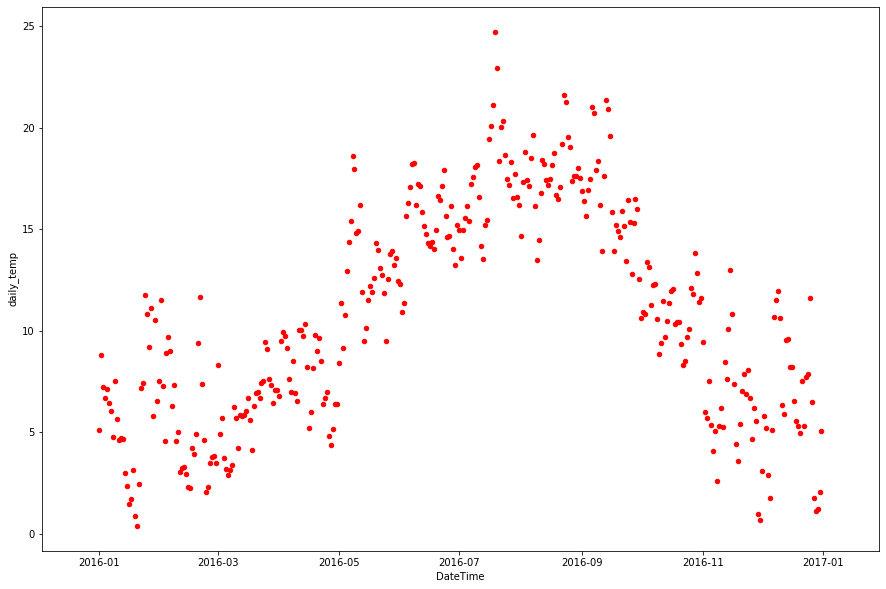

In [19]:
df_new.reset_index().plot(x='DateTime', y='daily_temp', color='red', kind='scatter', figsize=(15, 10))
plt.show()